In [24]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import image
import numpy as np
from keras.applications import VGG19

# Import the VGG network

In [26]:
conv_vgg = VGG19(include_top=False,input_shape=(224, 224, 3),
                weights='imagenet')

# Load your final model 

In [27]:
model=load_model("model1.h5")

In [31]:
def load_image(img_path):
    org_img = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img) 
    img_tensor /= 255.  
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()
    
    return img_tensor

In [44]:
def prediction(img_tensor):
    # Extract features from the respective VGG network
    features = conv_vgg.predict(img_tensor.reshape(1,224, 224, 3)) #default input shape of VGG model 

    # Make prediction
    try:
        prediction = model.predict_classes(features)
    except:
        prediction = model.predict_classes(features.reshape(1, 7*7*512))
        
    classes = ["Buildings", "Forest", "Glacier", "Mountains", "Sea", "Street"]
    print(classes[prediction[0]])

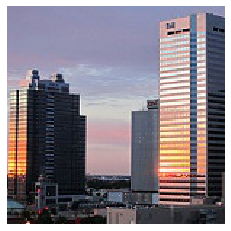

Buildings


In [45]:
prediction(load_image("5.jpg"))

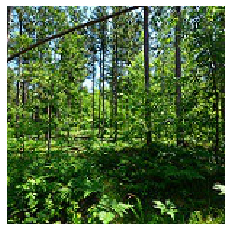

Forest


In [46]:
prediction(load_image("64.jpg"))

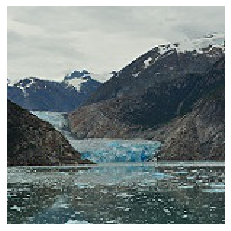

Glacier


In [47]:
prediction(load_image("70.jpg"))

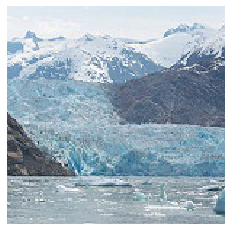

Glacier


In [48]:
prediction(load_image("101.jpg"))

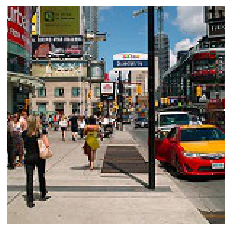

Street


In [49]:
prediction(load_image("121.jpg"))

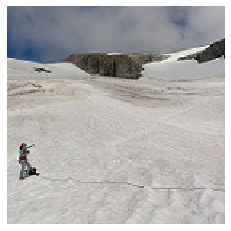

Glacier


In [50]:
prediction(load_image("127.jpg"))

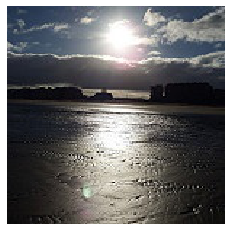

Sea


In [51]:
prediction(load_image("129.jpg"))

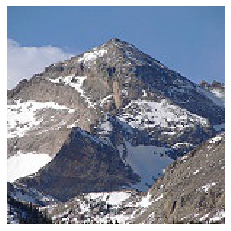

Mountains


In [52]:
prediction(load_image("251.jpg"))

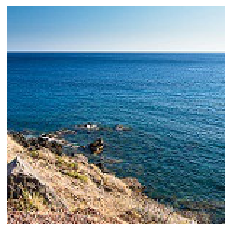

Sea


In [53]:
prediction(load_image("429.jpg"))